TITLE OF PROJECT

Handwritten Digit Detection using Classification Analysis


OBJECTIVE

To develop a machine learning model that can accurately classify handwritten digits  from images using the scikit-learn digits dataset.


DATA SOURCE

The dataset used in this project is the load_digits dataset from scikit-learn, which consists of 8x8 pixel images of handwritten digits based on YBI reference.


IMPORT LIBRARY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split



IMPORT DATA

In [ ]:
df=load_digits()

DESCRIBE DATA

In [ ]:

print(df.keys())


print("Shape of data:",df.data.shape)
print("Shape of target:", df.target.shape)

print("Target classes:", np.unique(df.target))



dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Shape of data: (1797, 64)
Shape of target: (1797,)
Target classes: [0 1 2 3 4 5 6 7 8 9]


DATA VISUALIZATION

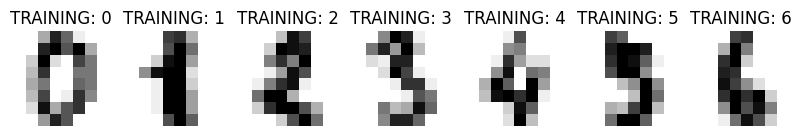

In [ ]:
# PLOT SOME OF THE SAMPLE IMAGES WITH LABELS
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes, df.images[:7], df.target[:7]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"TRAINING: {label}")
plt.show()


DATA PREPROCESSING

In [ ]:


n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))


print("New shape of data:", data.shape)



X = data
y = df.target


New shape of data: (1797, 64)


TRAIN TEST SPLIT

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (1437, 64)
X_test shape: (360, 64)
y_train shape: (1437,)
y_test shape: (360,)


MODELLING

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=10000)

MODEL EVALUATION

In [ ]:

y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)


print("Classification Report:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Model accuracy: 0.9722222222222222
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0

PREDICTION

In [ ]:
sample_image = X_test[0].reshape(1, -1)
predicted_label = model.predict(sample_image)
print("Predicted label for the first test image:", predicted_label)



Predicted label for the first test image: [6]


EXPLANATION

This project shows the process of developing a classification model for handwritten digit detection using classification analysis. The dataset from scikit-learn provides 8x8 pixel images of digits, which are flattened for training. After splitting the data into training and testing sets, the classification  is trained and evaluated using metrics like accuracy, classification reports, and confusion matrices. Predictions can be made for new images to determine the handwritten digit label.